In [66]:
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf
import os
import questionary
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.common import URL
from MCForecastTools import MCSimulation
from datetime import datetime, timedelta

In [107]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv(".\\SAMPLE.env")

True

In [108]:
# Using the YFinance library, make an API call to access the historical prices of Bitcoin over the last three years

In [166]:
btc = yf.Ticker("ETH-USD")


In [167]:
#btc_hist = btc.history(period="3y")
btc_hist = btc.history(period="6mo")

In [168]:
# Collect the Bitcoin data into DataFrame

In [169]:
btc_price_df = pd.DataFrame(btc_hist["Close"])
btc_price_df.dropna().copy()
btc_price_df["Close"] = btc_price_df["Close"].astype("float")

In [170]:
btc_price_df

,Close
Date,
2022-03-12,2574.754150
2022-03-13,2518.944580
2022-03-14,2590.696045
2022-03-15,2620.149658
2022-03-16,2772.055664
...,...
2022-09-08,1635.347656
2022-09-09,1719.085449
2022-09-10,1776.203735


In [171]:
# Using the YFinance library, make an API call to access the historical prices of S&P 500 ETF over the last three years

In [178]:
spy = yf.Ticker("VOO")

In [179]:
#spy_hist = spy.history(period="3y")
spy_hist = spy.history(period="6mo")

In [180]:
# Collect the S&P 500 ETF data into DataFrame

In [181]:
spy_price_df = pd.DataFrame(spy_hist["Close"])
spy_price_df.dropna().copy()
spy_price_df["Close"] = spy_price_df["Close"].astype("float")

In [182]:
spy_price_df

,Close
Date,
2022-03-14,380.494110
2022-03-15,388.841644
2022-03-16,397.536652
2022-03-17,402.400269
2022-03-18,406.847015
...,...
2022-09-06,359.239990
2022-09-07,365.679993
2022-09-08,368.070007


In [183]:
# Collect the initial investment

In [184]:
#monthly_investment = questionary.text("How much money would you like to invest monthly (50/50 split)?").ask()
monthly_investment = "1516"
monthly_investment = float(monthly_investment)

In [185]:
# Calculate the Bitcoin initial investment 

In [186]:
btc_investment = monthly_investment / 2
print(f"Monthly BTC Investment: ${btc_investment:.2f}")

Monthly BTC Investment: $900.00


In [187]:
# Calculate the daily number of Bitcoin coins based on the Bitcoin initial investment

In [188]:
btc_coins_list = []

for price in btc_price_df['Close']:
    btc_coins = btc_investment / price
    btc_coins_list.append(btc_coins)

In [189]:
# Calculate the total current Bitcoin coins based on recurring monthly investment and collect into DataFrame

In [190]:
btc_price_df['Coins'] = btc_coins_list
btc_coins_df = pd.DataFrame(btc_price_df["Coins"])
btc_coins_df.reset_index(inplace=True)
btc_coins_df = btc_coins_df.rename(columns = {'index':'Date'})

In [191]:
btc_period = btc_coins_df.Date.dt.to_period("M")
avg_btc_coins_df = btc_coins_df.groupby(btc_period)['Coins'].mean()
total_btc_coins = avg_btc_coins_df.sum()
print(f"Total Current Bitcoin Coins: {total_btc_coins:.5f}")

Total Current Bitcoin Coins: 3.46387


In [192]:
# Calculate the total current Bitcoin wallet in USD using current Bitcoin price

In [193]:
btc_current_price = btc_price_df["Close"].iloc[-1]
print(f"Current Bitcoin Price: ${btc_current_price:.2f}") 
btc_usd_wallet = total_btc_coins * btc_current_price
print(f"Total Current Bitcoin Wallet (USD): ${btc_usd_wallet:.2f}")

Current Bitcoin Price: $1711.46
Total Current Bitcoin Wallet (USD): $5928.26


In [194]:
# Calculate the S&P 500 ETF initial investment

In [195]:
spy_investment = monthly_investment / 2
print(f"Monthly SPY Investment: ${spy_investment:.2f}")

Monthly SPY Investment: $900.00


In [196]:
# Calculate the daily number of S&P 500 ETF shares based on the S&P 500 ETF initial investment

In [197]:
spy_shares_list = []

for price in spy_price_df['Close']:
    spy_shares = spy_investment / price
    spy_shares_list.append(spy_shares)
    

In [198]:
# Calculate the total current S&P 500 ETF shares based on recurring monthly investment and collect into DataFrame

In [199]:
spy_price_df['Shares'] = spy_shares_list
spy_shares_df = pd.DataFrame(spy_price_df["Shares"])
spy_shares_df.reset_index(inplace=True)
spy_shares_df = spy_shares_df.rename(columns = {'index':'Date'})

In [200]:
spy_period = spy_shares_df.Date.dt.to_period("M")
avg_spy_shares_df = spy_shares_df.groupby(spy_period)['Shares'].mean()
total_spy_shares = avg_spy_shares_df.sum()
print(f"Total Current S&P 500 ETF Shares: {total_spy_shares:.5f}")

Total Current S&P 500 ETF Shares: 16.74898


In [201]:
# Calculate the total current S&P 500 ETF wallet in USD using current S&P 500 ETF price

In [202]:
spy_current_price = spy_price_df["Close"].iloc[-1]
print(f"Current S&P 500 ETF Price: ${spy_current_price:.2f}")  
spy_usd_wallet = total_spy_shares * spy_current_price
print(f"Total Current S&P 500 ETF Wallet (USD): ${spy_usd_wallet:.2f}")

Current S&P 500 ETF Price: $377.86
Total Current S&P 500 ETF Wallet (USD): $6328.77


In [203]:
# Calculate the total value of portfolio in USD

In [204]:
total_portfolio = btc_usd_wallet + spy_usd_wallet
print(f"Total Value of Portfolio (USD): ${total_portfolio:.2f}")

Total Value of Portfolio (USD): $12257.03


In [205]:
# Create a savings DataFrame including the Bitcoin and S&P 500 ETF wallets

In [206]:
savings_df = pd.DataFrame(data=[btc_usd_wallet, spy_usd_wallet], columns=['Amount'], index=['Bitcoin', 'S&P 500 ETF'])

<AxesSubplot:title={'center':'Total Value of Portfolio (USD)'}, ylabel='Amount'>

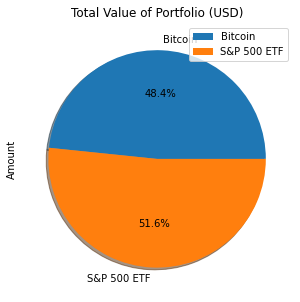

In [207]:
# Plot the total value of the member's portfolio (Bitcoin and S&P 500 ETF) in a pie chart
savings_df.plot.pie(y='Amount',figsize=(5, 5),title="Total Value of Portfolio (USD)",
                    autopct='%1.1f%%', shadow=True, startangle=0)

In [210]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    URL('https://paper-api.alpaca.markets'),
    api_version = "v2"
)

In [211]:
# Set timeframe to 1Day
timeframe = "1Day"

# Set start and end dates of 3 years back from yesterday's date
today = datetime.today()
yesterday = today - timedelta(days=1)
#three_years = today - timedelta(days=756)
one_month = today - timedelta(days=180)
#sDateStr = three_years.strftime("%Y-%m-%d")
sDateStr = one_month.strftime("%Y-%m-%d")
eDateStr = yesterday.strftime("%Y-%m-%d")

start_date = pd.Timestamp(sDateStr, tz="America/New_York").isoformat()
end_date = pd.Timestamp(eDateStr, tz="America/New_York").isoformat()

In [212]:
# Use the Alpaca get_bars function to get current closing prices of S&P 500 ETF
spy_data = api.get_bars(
    ["VOO"],
    timeframe,
    start_date,
    end_date
).df

# Reorganize the S&P 500 ETF DataFrame
spy_data.index = spy_data.index.strftime('%Y-%m-%d')
SPY = spy_data[spy_data['symbol']=='VOO'].drop('symbol', axis=1)


# Review the first 5 rows of the Alpaca DataFrame
SPY.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-03-16,395.24,400.55,390.55,400.51,6855995,111324,396.597504
2022-03-17,398.71,405.56,398.30,405.41,4983388,95313,401.916250
2022-03-18,404.00,410.28,403.24,409.89,5679936,105365,407.066935
2022-03-21,410.00,411.75,406.43,409.91,3996100,93462,409.303114
2022-03-22,411.21,415.52,411.20,414.67,4070271,81294,413.812678


In [213]:
# Use the Alpaca get_crypto_bars function to get current closing prices of Bitcoin
bitcoin_data = api.get_crypto_bars(
     ["ETHUSD"], 
     timeframe,
     start_date,
     end_date
).df

# Reorganize the Bitcoin DataFrame
bitcoin_data.index = bitcoin_data.index.strftime('%Y-%m-%d')
BTC = bitcoin_data[bitcoin_data['exchange']=='CBSE'].drop(['exchange','symbol'], axis=1)

# Review the first 5 rows of the Alpaca DataFrame
BTC.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-03-16,2620.12,2789.58,2612.94,2775.03,192222.109617,781282,2716.468322
2022-03-17,2774.52,2839.59,2747.77,2781.46,227972.926433,690382,2800.590100
2022-03-18,2781.46,2987.00,2781.24,2947.21,216656.043999,732090,2889.459161
2022-03-19,2947.56,2988.89,2895.37,2921.03,98475.790897,462658,2947.850542
2022-03-20,2920.74,2936.36,2819.18,2847.32,105449.862841,461166,2870.136013


In [214]:
# Combine Bitcoin and S&P 500 ETF DataFrames into one DataFrame and remove any null values

In [215]:
prices_df = pd.concat([BTC,SPY],axis=1, keys=['BTC','SPY'])
prices_df = prices_df.dropna().copy()

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()

BTC                                                        \
               open     high      low    close         volume trade_count   
timestamp                                                                   
2022-03-16  2620.12  2789.58  2612.94  2775.03  192222.109617      781282   
2022-03-17  2774.52  2839.59  2747.77  2781.46  227972.926433      690382   
2022-03-18  2781.46  2987.00  2781.24  2947.21  216656.043999      732090   
2022-03-21  2847.45  3053.98  2844.62  3028.52  189118.239502      604057   
2022-03-22  2988.07  3031.07  2920.64  2939.32  161420.315839      493771   

                            SPY                                     \
                   vwap    open    high     low   close     volume   
timestamp                                                            
2022-03-16  2716.468322  395.24  400.55  390.55  400.51  6855995.0   
2022-03-17  2800.590100  398.71  405.56  398.30  405.41  4983388.0   
2022-03-18  2889.459161  404.00  410.28  403.24  409.89  5679936.0   
2022-03-21  2936.646811  410.00  411.75  406.43  409.91  3996100.0   
2022-03-22  2993.360235  411.21  415.52  411.20  414.67  4070271.0   

                                    
           trade_count        vwap  
timestamp                           
2022-03-16    111324.0  396.597504  
2022-03-17     95313.0  401.916250  
2022-03-18    105365.0  407.066935  
2022-03-21     93462.0  409.303114  
2022-03-22     81294.0  413.812678

In [216]:
# Configure the Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 80% to BTC and 20% to SPY.
# Run 500 samples

In [223]:
MC_tenyear_aggressive = MCSimulation(
    portfolio_data=prices_df,
    weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252*10,
)

# Review the simulation input data
MC_tenyear_aggressive.portfolio_data

BTC                                                        \
               open     high      low    close         volume trade_count   
timestamp                                                                   
2022-03-16  2620.12  2789.58  2612.94  2775.03  192222.109617      781282   
2022-03-17  2774.52  2839.59  2747.77  2781.46  227972.926433      690382   
2022-03-18  2781.46  2987.00  2781.24  2947.21  216656.043999      732090   
2022-03-21  2847.45  3053.98  2844.62  3028.52  189118.239502      604057   
2022-03-22  2988.07  3031.07  2920.64  2939.32  161420.315839      493771   
...             ...      ...      ...      ...            ...         ...   
2022-09-02  1593.94  1650.00  1546.20  1565.65  300054.208910      467303   
2022-09-06  1640.88  1686.82  1489.98  1511.59  420536.503204      511758   
2022-09-07  1511.72  1657.68  1499.50  1642.60  299661.803134      460376   
2022-09-08  1642.60  1710.18  1594.31  1697.03  351340.150907      509532   
2022-09-09  1696.98  1746.87  1684.82  1733.74  318443.892503      496542   

                                         SPY                             \
                   vwap daily_return    open     high       low   close   
timestamp                                                                 
2022-03-16  2716.468322          NaN  395.24  400.550  390.5500  400.51   
2022-03-17  2800.590100     0.002317  398.71  405.560  398.3000  405.41   
2022-03-18  2889.459161     0.059591  404.00  410.280  403.2400  409.89   
2022-03-21  2936.646811     0.027589  410.00  411.750  406.4300  409.91   
2022-03-22  2993.360235    -0.029453  411.21  415.520  411.2000  414.67   
...                 ...          ...     ...      ...       ...     ...   
2022-09-02  1599.492138    -0.017730  368.05  369.130  358.7800  360.45   
2022-09-06  1611.234681    -0.034529  361.31  362.280  357.0000  359.24   
2022-09-07  1571.606957     0.086670  358.91  366.375  358.6904  365.68   
2022-09-08  1638.371315     0.033136  363.47  368.480  362.2700  368.07   
2022-09-09  1716.145928     0.021632  370.24  374.607  369.9800  373.75   

                                                            
               volume trade_count        vwap daily_return  
timestamp                                                   
2022-03-16  6855995.0    111324.0  396.597504          NaN  
2022-03-17  4983388.0     95313.0  401.916250     0.012234  
2022-03-18  5679936.0    105365.0  407.066935     0.011051  
2022-03-21  3996100.0     93462.0  409.303114     0.000049  
2022-03-22  4070271.0     81294.0  413.812678     0.011612  
...               ...         ...         ...          ...  
2022-09-02  4483129.0     93411.0  364.289103    -0.010487  
2022-09-06  5590670.0    111979.0  359.542736    -0.003357  
2022-09-07  4105949.0     68383.0  364.141702     0.017927  
2022-09-08  3618172.0     78080.0  365.886529     0.006536  
2022-09-09  2595604.0     56741.0  372.733266     0.015432  

[123 rows x 16 columns]

In [224]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear_aggressive.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995656,0.960899,0.996904,1.006454,1.001857,0.971959,0.995325,0.987282,0.971843,0.970107,...,0.993446,1.011793,1.008244,1.043201,0.993318,0.985556,1.004476,0.997664,1.006831,1.014714
2,1.004215,0.956297,0.996216,1.009749,1.010557,0.927496,1.001264,0.997297,0.998654,0.974750,...,0.977013,1.022811,1.041838,1.018198,0.981373,1.016774,1.000793,1.040919,1.001575,1.003117
3,0.984992,0.932471,1.025808,1.041417,1.000248,0.919849,1.020696,0.978103,0.993394,0.987125,...,0.994576,1.014507,1.006955,1.026424,0.978832,1.033969,0.988979,1.046886,1.042284,1.026261
4,0.985974,0.909091,1.028871,1.010958,0.979239,0.920670,1.025503,0.975990,0.988750,0.990353,...,0.963105,1.023251,1.003251,1.035226,0.960316,1.031491,1.002312,1.042264,1.009516,1.069567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.671713,0.018772,0.120906,0.047623,0.311921,0.080430,0.290899,0.081021,0.082063,0.117401,...,0.259952,0.071997,0.072846,0.042092,0.327682,0.862394,0.099862,0.281545,0.277472,0.255033
2517,0.668067,0.019041,0.122200,0.047663,0.311618,0.080325,0.298781,0.078617,0.080976,0.120855,...,0.256066,0.070404,0.070145,0.042860,0.337682,0.853776,0.097858,0.284156,0.285897,0.255015
2518,0.668583,0.018743,0.122099,0.048660,0.311383,0.078803,0.306189,0.078843,0.082050,0.118444,...,0.253435,0.069832,0.070724,0.042956,0.335463,0.840361,0.099238,0.287293,0.276939,0.251250
2519,0.650617,0.018971,0.123147,0.048153,0.312469,0.078179,0.303743,0.079154,0.081899,0.119724,...,0.252518,0.070255,0.070321,0.042568,0.340912,0.827480,0.100969,0.295759,0.272985,0.252382


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

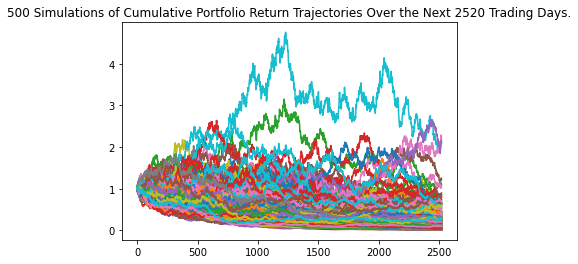

In [225]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_tenyear_aggressive.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

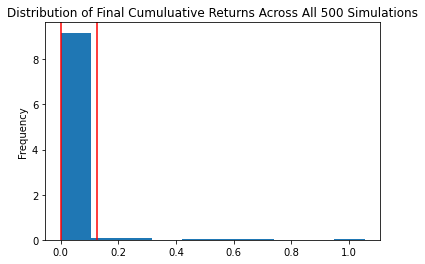

In [220]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation
MC_tenyear_aggressive.plot_distribution()

In [221]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_tenyear_statistics = MC_tenyear_aggressive.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_tenyear_statistics)

count           5.000000e+02
mean            1.672478e-02
std             7.988994e-02
min             1.878966e-07
25%             1.312061e-04
50%             8.132556e-04
75%             4.566163e-03
max             1.054515e+00
95% CI Lower    4.453483e-06
95% CI Upper    1.265253e-01
Name: 2520, dtype: float64


In [222]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current crypto/stock portfolio
ci_lower_ten_cumulative_return = round(MC_tenyear_statistics[8]*monthly_investment,2)
ci_upper_ten_cumulative_return = round(MC_tenyear_statistics[9]*monthly_investment,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of"
      f" ${monthly_investment:.2f} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")

There is a 95% chance that an initial investment of $1800.00 in the portfolio over the next 10 years will end within the range of $0.01 and $227.75.
